# Problem Set 1 -- Radiative transfer

In [1]:
import PS1

## Problem 1

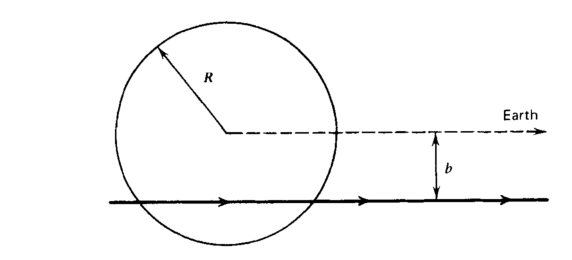

In [2]:
PS1.problem1()

### a) One zone model intensity

Consider a uniform sphere of gas of radius $R$ radiating with constant emission and absorption coefficients $j_\nu$ and $\alpha_\nu$, which is seen by an observer at a distance $D \gg R$. Solve the radiative transfer equation for the specific intensity $I_\nu$ of the sphere as a function of the impact parameter $b$ of parallel light rays from its center (see diagram).

Start with the radiative transfer equation and formally solve it for a ray that begins anywhere on the surface of the *rear* hemisphere of the star as seen from Earth.  $I_\nu(s)$ is the specific intensity of light at some distance $s$ from the rear surface of the star. Our initial condition is $I_\nu(0) = 0$ (i.e. empty space doesn't create light).

\begin{align}
    \frac{dI_\nu}{s} &= -\alpha_\nu I_\nu + j_\nu\\
    \implies \ln\left|\alpha_\nu I_\nu - j_\nu\right| &= -\alpha_\nu s + c\\
    \implies \alpha_\nu I_\nu - j_\nu &= Ce^{-\alpha_\nu s}\\
    \alpha_\nu 0 - j_\nu &= Ce^{-\alpha_\nu 0}\\
    \implies -j_\nu &= C\\
    \implies I_\nu &= \frac{j_\nu}{\alpha_\nu}(1 - e^{-\alpha_\nu s})\\
\end{align}

Recognize $\frac{j_\nu}{\alpha_\nu}$ as the constant source function $S_\nu$.  For any impact parameter $b$, through some geometric reasoning, we can see that the total distance travelled from the rear surface to the front surface of the star is $2 \sqrt{R^2 - b^2}$.  We can now the specific intensity as seen from earth $I_\nu(b)$ in terms of the impact parameter as:

$$
    I_\nu(b) = S_\nu(1 - e^{-2\alpha_\nu\sqrt{R^2 - b^2}})
$$

### b) Optically thin and thick intensity profiles

Plot sample intensity profiles in the limits of $\alpha_\nu R \ll 1$ and $\alpha_\nu R > 1$ for some values of the other parameters. How does the image of the gas sphere differ in the optically thin and thick limits?

Let's analytically expand these first:

For $\alpha_\nu R \ll 1$
\begin{align}
    I_\nu &= S_\nu(1 - \exp\left[-2\alpha_\nu R \sqrt{1 - \frac{b^2}{R^2}}\right])\\
    \implies I_\nu &\simeq S_\nu(1 - 1 + 2\alpha_\nu \sqrt{R^2 - b^2})\\
    \implies I_\nu &\simeq 2 S_\nu \alpha_\nu \sqrt{R^2 - b^2}\\
    \implies I_\nu &\simeq 2 j_\nu \sqrt{R^2 - b^2}
\end{align}

For $\alpha_\nu R ~ 1$ the whole expression is required.  For $\alpha_nu R \gg 1$ (even just 3 or 4), that results in the exponential being suppressed unless $b$ approaches $R$.  Hence $I_\nu = S$ for any small $b$ compared to $R$.  If $b$ is close to $R$, define a new quantity $h$ which is the *altitude* of the ray from the edge of the sphere.  Thus $h = R - b$.   With the understanding that $h \ll R$
\begin{align}
    I_\nu &= S_\nu(1 - \exp\left[-2\alpha_\nu \sqrt{R^2 - R^2 - h^2 + 2Rh}\right])\\
    \implies I_\nu &\simeq S_\nu(1 - e^{\alpha_\nu\sqrt{8Rh}})
\end{align}


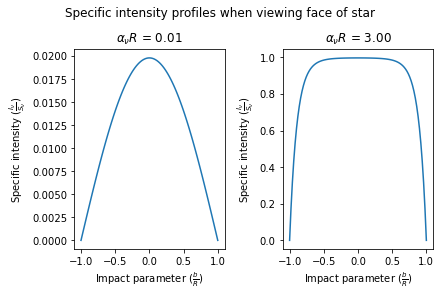

In [3]:
PS1.solution1()

### c) One zone model flux density

What is the observed flux density integrated over the sphere? What is its maximum possible value, and how does the maximum possible value relate to the concept of brightness temperature?

Align the polar axis from the center of the star to the planet.  $\theta_c$ would be the half angle subtended at the receiver to the edge of the stellar disc.  For a distant star, this angle is 0 (point source approximation of stellar disc) allowing $\cos \theta_c = 1$. This maximizes the about of flux density we receive.  This let's us integrate over the entire hemisphere.
\begin{align*}
    I_\nu(b) &= S_\nu(1 - e^{-2\alpha_\nu\sqrt{R^2 - b^2}})\\
    F_\nu &= \int I_\nu \,d\Omega\\
    &= \int_0^{2\pi} \int_{0}^1 S_\nu (1 - e^{-2\alpha_\nu R \cos\theta}) \,d(\cos\theta)\, d\phi\\
    &= 2\pi S_\nu \left(1 - \frac{1 - e^{-2\alpha_\nu R}}{2\alpha_\nu R}\right)
\end{align*}

This has a minimum of 0 at $\alpha_\nu R = 0$ and a maximum of $2\pi S_\nu$ as $\alpha_\nu R \to \inf$. For this maximum possible flux density, $F_\nu = 2\pi S_\nu$ and if Raleigh-Jeans law applies, $S_\nu = I_\nu = \frac{2\nu^2}{c^2}kT_b$ giving us a brightness temperature upper-bound for any particular frequency we observe.

## Problem 2

### a) Sample galaxy cluster X-ray spectrum

The read in data are stored as a dictionary with colum headings 'ekev' (photon energy in units of keV) and photon number intensity 'nekev' (in units of photons / cm^2 / s / keV)

First, convert these quantities to flux density in cgs units. Then, make a log-log plot of the SED, $\nu L_\nu$ vs. $\nu$. (Hint: it might be useful to check your work by looking up a typical luminosity of a galaxy cluster)

The distance to this Galaxy cluster is $\simeq 100$ Mpc $= 3.1\times10^{26}$ cm, and its radius is $R \approx 1$ Mpc

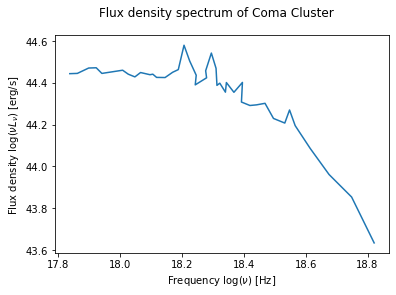

In [4]:
PS1.solution2()

The $10^{44}$ ergs per second value agrees fairly well with established values of flux density.  It is the flux density of a few trillion solar mass stars which seems roughly agree with the estimate of needing a few hundred billion stars in a galaxy, let alone a galaxy cluster.

### b) Estimate the color temperature $T_c$ from the X-ray 

If we assume that we are already past the black-body peak and $h\nu \gg kT$, we can use Wein's displacement law.  We use the highly scientific procedure of eyeballing the peak frequency at $10^{18.2}$ hertz. Hence:
$$
    T_c = \frac{\nu_m}{5.88 \times 10^{10}\,\text{Hz}\,\text{K}^{-1}} = 2.7 \times 10^7 \text{K}
$$

### c) Compare to a one zone spherical bremsstrahlung model solution

Now we can plot a model against the data using an emissivity appropriate for Bremsstrahlung from hydrogen with number density $n$ and temperature $T$, both in cgs units

$$
    j_\nu \simeq 10^{-38} \, T^{-1/2} \, n^2 e^{-h\nu/kT} \text{erg}\,\text{cm}^{-2}\,\text{s}^{-1}\,\text{Hz}^{-1}\,\text{ster}^{-1}
$$
Kartik nb: I think this is missing a cm$^{-1}$.

Use your solution to Problem 1 in the optically thin limit, $\alpha_\nu R \ll 1$, along with this form of $j_\nu$ to estimate $n$ and $T$ for the intracluster medium.

At cut-off for thermal Bremsstrahlung, we know $h\nu \sim kT$. The region below cutoff is essentially flat. Hence for $h\nu \ll kT$, using $R$ as 1Mpc, we can say compute:

\begin{align*}
    I_\nu &= \frac{ 2 \times 10^{-38} \times 3.1 \times 10^{24}}{e} \frac{n^2}{\sqrt{T}} \text{erg}\,\text{cm}^{-2}\,\text{s}^{-1}\,\text{Hz}^{-1}\,\text{ster}^{-1}\\
    F_\nu &= \pi I_\nu\\
    \implies \frac{n^2}{\sqrt{T}} &= \frac{2 \times 10^{-28}}{ 2 \pi \times 10^{-38} \times 3.1 \times 10^{24}} = 10^{-15} \text{cm}^{-6}\text{K}^{-1/2}
\end{align*}

Further, we know the cut-off point $T_\text{cut} = \frac{h\nu}{k} = 7.6 \times 10^7 K$. Hence we can deduce:

$$
    n = \sqrt{10^{15} \times \sqrt{7.6 \times 10^7}} = 3 \times 10^{-6} \text{cm}^{-3}
$$

### d) Optical depth consistency check

Calculate $\alpha_\nu R$ for your favored parameters assuming LTE. Is the result consistent with our assumption in part c? Assuming $R$ is a constant, at what frequency $\nu_\tau$ should the bremsstrahlung radiation become optically thick (ignoring all other sources of emission, absorption, scattering)?

If we use:
\begin{align*}
    B_\nu(T) &= \frac{j_\nu}{\alpha_\nu}\\
    B_\nu(T) &= \frac{2h\nu^3 / c^2}{e^\frac{h\nu}{kT} - 1}\\
    n &= 3 \times 10^-6 \text{cm}^-3\\
    T &= 7.6 \times 10^7 \text{K}\\
    \implies \alpha_\nu &= 2.5 \times 10^{-7} \frac{1 - e^\frac{-h\nu}{kT}}{\nu^3} \text{cm}^{-1}
    \implies \alpha_\nu R &= 7.7 \times 10^{17} \frac{1 - e^\frac{-h\nu}{kT}}{\nu^3}
\end{align*}

## Problem 3

### a) Radiation and gravitational pressure balance

Show that an optically thin cloud of material can be ejected by radiation pressure from a central source of luminosity $L$ and mass $M$ if $$L > \frac{4\pi GM c}{\kappa},$$ where $\kappa$ is the integrated opacity of the cloud (defined by absorption coefficient $\alpha = \kappa \rho$, where $\rho$ is the mass density)

Hint: see R&L end of section 1.4

### b) Ejected velocity

Show that the terminal velocity attained by such a cloud under the influence of gravitational and radiation forces alone, if it starts at rest a distance $R$ from the center, is

$$v^2 = \frac{2GM}{R}\left(\frac{\kappa L}{4\pi GMc}-1\right)$$

### c) Eddington limit

A minimum opacity value comes from electron (Thomson) scattering off free electrons, $\kappa = \kappa_T$, where $\kappa_T = \sigma_T / m_p = 0.4$ cm$^{2}$ g$^{-1}$ for pure hydrogen. Using this opacity, calculate the Eddington luminosity $L_{\rm Edd} (M)$, above which hydrogen will be ejected by radiation pressure. Scale your result to the mass of the Sun, $M_{\rm Sun} = 2\times10^{33}$ g.